In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
n_samples = 1000

# Define latent factors with ecommerce interpretations:
# - Spending Power: influences total spending and average order value.
# - Engagement: influences frequency of transactions, browsing time, and recency.
# - Loyalty: influences account age and loyalty points.
spending_power = np.random.normal(loc=50, scale=10, size=n_samples)
engagement     = np.random.normal(loc=5,  scale=1.5, size=n_samples)
loyalty        = np.random.normal(loc=3,  scale=1,   size=n_samples)

# Generate observed e-commerce features as linear combinations of latent factors with added noise
# Total Spending (in USD): Driven by spending power
total_spending = spending_power * np.random.uniform(15, 25) + np.random.normal(scale=50, size=n_samples)
# Number of Transactions: Driven by engagement
num_transactions = np.clip(engagement * np.random.uniform(8, 12) + np.random.normal(scale=3, size=n_samples), 1, None)
# Average Order Value (in USD): Roughly proportional to spending power
avg_order_value = spending_power * np.random.uniform(8, 12) + np.random.normal(scale=20, size=n_samples)
# Account Age (in years): Driven by loyalty
account_age = np.clip(loyalty * np.random.uniform(2, 4) + np.random.normal(scale=0.5, size=n_samples), 0.5, None)
# Product Return Rate: Inversely related to loyalty (more loyal customers return less)
product_return_rate = np.clip(1 - (loyalty / 10) + np.random.normal(scale=0.05, size=n_samples), 0, 1)
# Discount Usage (number of times discounts used): Inversely related to spending power
discount_usage = np.clip(np.random.uniform(0, 5, n_samples) + (60 - spending_power) / 10, 0, None)
# Last Purchase Days (days since last purchase): Inversely related to engagement (more engaged = more recent)
last_purchase_days = np.clip(np.random.uniform(0, 365, n_samples) - engagement * np.random.uniform(10, 30), 1, 365)
# Browsing Time (in minutes per session): Driven by engagement
browsing_time = np.clip(engagement * np.random.uniform(5, 15) + np.random.normal(scale=5, size=n_samples), 1, None)
# Cart Abandonment Rate: Random but can be influenced by engagement (more engaged, lower rate)
cart_abandonment_rate = np.clip(np.random.uniform(0, 1, n_samples) - engagement/20, 0, 1)
# Loyalty Points: Driven by loyalty
loyalty_points = np.clip(loyalty * np.random.uniform(50, 100) + np.random.normal(scale=20, size=n_samples), 0, None)

df = pd.DataFrame({
    'Total_Spending': total_spending,
    'Num_Transactions': num_transactions,
    'Average_Order_Value': avg_order_value,
    'Account_Age': account_age,
    'Product_Return_Rate': product_return_rate,
    'Discount_Usage': discount_usage,
    'Last_Purchase_Days': last_purchase_days,
    'Browsing_Time': browsing_time,
    'Cart_Abandonment_Rate': cart_abandonment_rate,
    'Loyalty_Points': loyalty_points,
})

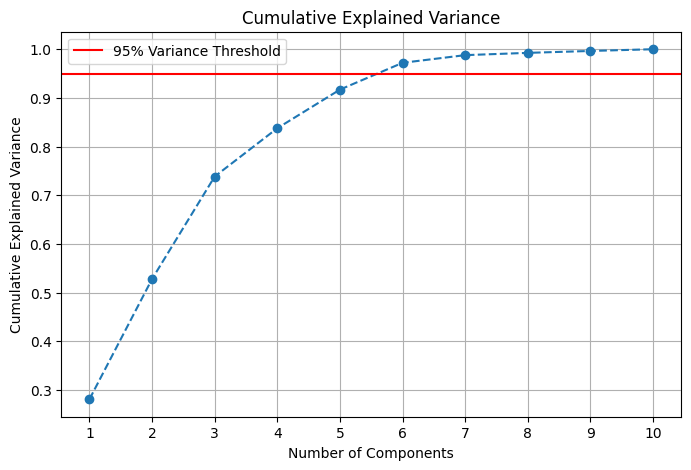

In [ ]:
# Scale the data so each feature contributes equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA without limiting components to view full explained variance ratios
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

# Cumulative explained variance plot
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

Number of components to explain 95% variance: 6


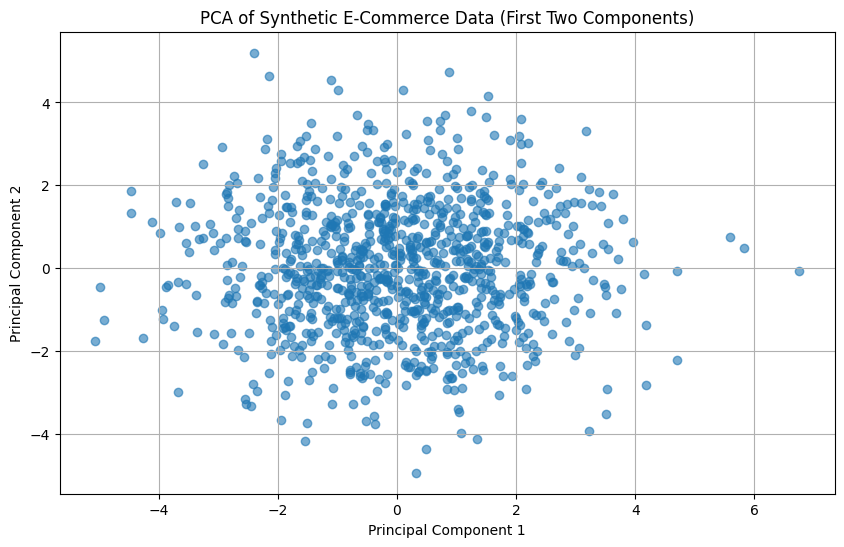

Explained variance by each selected component: [0.28084003 0.24709884 0.21050663 0.09922404 0.0793697  0.05506384]


In [ ]:

# Determine the number of components required to explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to explain 95% variance:", n_components_95)

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components_95)
X_pca = pca.fit_transform(X_scaled)

# If there are at least 2 components, visualize the first two
if n_components_95 >= 2:
    df_pca = pd.DataFrame(X_pca[:, :2], columns=['Principal Component 1', 'Principal Component 2'])
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], alpha=0.6)
    plt.title('PCA of Synthetic E-Commerce Data (First Two Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()
else:
    print("Less than 2 components were selected; cannot plot in 2D.")

print("Explained variance by each selected component:", pca.explained_variance_ratio_)